# Intensities calibration

We are looking for a good formula to generate default intensities of $40$ members with the following inputs:

\begin{array}{|c|c|}
\hline
\text{Member nb.} & 1 & 20 & 40 \\
\hline
\lambda_{\text{cum}} & (1-R) \times 1000 \text{ bps} & (1-R) \times 150 \text{ bps} & (1-R) \times 20 \text{ bps} \\
\hline
\end{array}

such that the dependance structure is:

\begin{array}{|c|c|}
\hline
\text{Nb. Members} & 5 & 10 & 20 & 40\\
\hline
\text{Cum }\lambda_{\text{sys}} & 500 \text{ bps} & 100 \text{ bps} & 70 \text{ bps} & 50 \text{ bps}\\
\hline
\end{array}

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
recov = 0.4

cds_spreads = [1000e-4, 150e-4, 20e-4]
cum_lambdas = [s*(1-recov) for s in cds_spreads]
cum_indexes = [0, 20, 39]

sys_lambdas = [500e-4, 100e-4, 70e-4, 25e-4]
sys_indexes = [5, 10, 20, 39]

print "Cum indexes = %s"%cum_indexes
print "Cum lambdas = %s"%cum_lambdas

print "\nSys indexes = %s"%sys_indexes
print "Sys lambdas = %s"%sys_lambdas

Cum indexes = [0, 20, 39]
Cum lambdas = [0.06, 0.009, 0.0012]

Sys indexes = [5, 10, 20, 39]
Sys lambdas = [0.05, 0.01, 0.007, 0.0025]


In [3]:
sys_dict = dict((ind, lamb) for (ind, lamb) in zip(sys_indexes, sys_lambdas))
cum_dict = dict((ind, lamb) for (ind, lamb) in zip(cum_indexes, cum_lambdas))

In [4]:
from collections import OrderedDict

#epsilon = 5e-4
epsilon = 10e-4
idio_dict = dict()

for (k,v) in cum_dict.iteritems():
    ind = 0
    for sys_key in sys_dict.keys():
        if k<=sys_key:
            ind = sys_key
    
    idio_dict[k] = np.maximum(v-sys_dict[ind], epsilon)
    
idio_dict =  OrderedDict(sorted(idio_dict.items(), key=lambda t: t[0]))
    
print "Idio indexes = %s"%idio_dict.keys()
print "Idio lambdas = %s"%idio_dict.values()

Idio indexes = [0, 20, 39]
Idio lambdas = [0.057499999999999996, 0.0064999999999999988, 0.001]


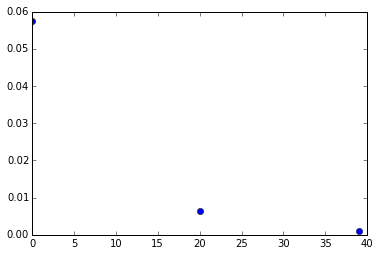

In [5]:
plt.plot(idio_dict.keys(), idio_dict.values(), 'o')
plt.show()

In [6]:
xs = np.arange(0, 40)

## Hyperbolic $x$ fit for the idiosyncratic intensities

We suppose that the idiosyncratic intensities are given by: $\lambda_i = \frac{A}{(i+1)^x} + B$, $x \in \mathbb{R}$.

In [7]:
x = 0.1

inv_indexes = [1./(i+1)**x for i in idio_dict.keys()]

slope, intercept, _, _, err = stats.linregress(inv_indexes, idio_dict.values())

A = slope
B = intercept

print A, B

0.186961180401 -0.129711447469


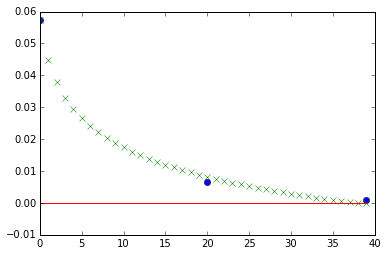

In [8]:
epsilon = 1e-4
ys = [np.maximum(A/(i+1)**x + B, epsilon) for i in xs]

plt.plot(idio_dict.keys(), idio_dict.values(), 'o')
plt.plot(xs, ys, 'x')
plt.plot(xs, [-epsilon for i in xs])
plt.show()

## Final inputs

In [9]:
from collections import OrderedDict

final_cumul_dict =  {x: y for (x, y) in zip(xs, ys)}
final_cumul_dict = OrderedDict(sorted(final_cumul_dict.items(), key=lambda t: t[0]))

sys_sorted_keys = sorted(sys_dict.keys())

for ind in final_cumul_dict.keys():
    sys_ind = np.searchsorted(sys_sorted_keys, ind)
    final_cumul_dict[ind] += sys_dict[sys_sorted_keys[sys_ind]]

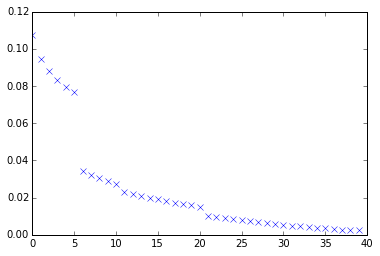

In [10]:
plt.plot(final_cumul_dict.keys(), final_cumul_dict.values(), 'x')
plt.show()